# L1 Language Models, the Chat Format and Tokens

## Setup
#### Load the API key and relevant Python libaries.
In this course, we've provided some code that loads the OpenAI API key for you.

In [1]:
import os
import openai
import tiktoken
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

#### helper function
This may look familiar if you took the earlier course "ChatGPT Prompt Engineering for Developers" Course. 

Throughout this course, we will use OpenAI's `gpt-3.5-turbo` model and the [chat completions endpoint](https://platform.openai.com/docs/guides/chat).

This helper function will make it easier to use prompts and look at the generated outputs. 

**Note**: In June 2023, OpenAI updated gpt-3.5-turbo. The results you see in the notebook may be slightly different than those in the video. Some of the prompts have also been slightly modified to produce the desired results.

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output 
    )
    return response.choices[0].message["content"]

**Note**: This and all other lab notebooks of this course use OpenAI library version `0.27.0`. 

In order to use the OpenAI library version `1.0.0`, here is the code that you would use instead for the get_completion function: 

```python
client = openai.OpenAI()

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content
```

In [6]:
client = openai.OpenAI()

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content

In [32]:
prompt = "What is the capital of France?"
messages = [{"role": "user", "content": prompt}]

response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0
)
response

ChatCompletion(id='chatcmpl-BPmlzcweZT7mWh687LJ3AHcxRboyx', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The capital of France is Paris.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1745485383, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_dbaca60df0', usage=CompletionUsage(completion_tokens=8, prompt_tokens=14, total_tokens=22, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [33]:
response.choices

[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The capital of France is Paris.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))]

In [34]:
response.usage

CompletionUsage(completion_tokens=8, prompt_tokens=14, total_tokens=22, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0))

In [38]:
print("prompt_tokens: " , response.usage.prompt_tokens)
print("completion_tokens: " , response.usage.completion_tokens)
print("total_tokens: " , response.usage.total_tokens)

prompt_tokens:  14
completion_tokens:  8
total_tokens:  22


## Prompt the model and get a completion

In [7]:
response = get_completion("What is the capital of France?")

In [4]:
print(response)

The capital of France is Paris.


## Tokens

In [11]:
response = get_completion("Take the letters in lollipop \
and reverse them")
print(response)

pilpolol


"lollipop" in reverse should be "popillol"

In [13]:
response = get_completion("""Take the letters in \
l-o-l-l-i-p-o-p and reverse them""")

In [14]:
response

'p-o-p-i-l-l-o-l'

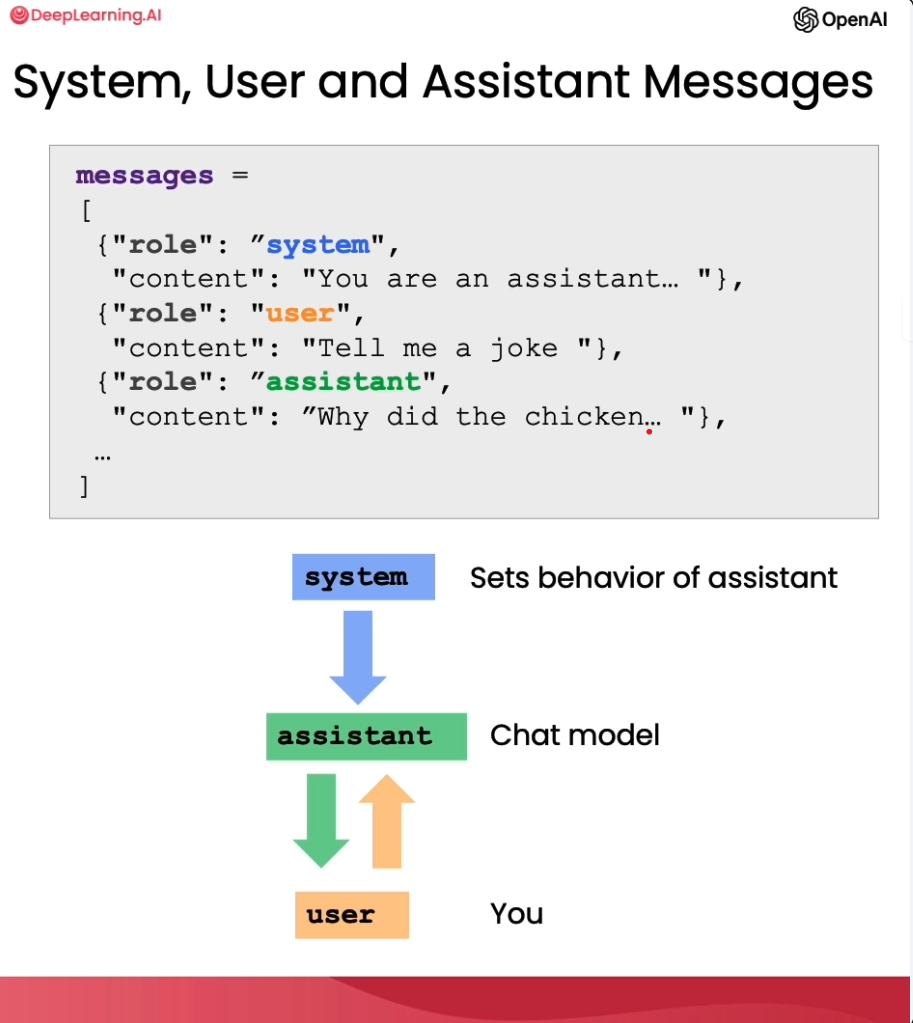

## Helper function (chat format)
Here's the helper function we'll use in this course.

In [21]:
def get_completion_from_messages(messages, 
                                 model="gpt-3.5-turbo", 
                                 temperature=0, 
                                 max_tokens=500):
    client = openai.OpenAI()

    #response = openai.ChatCompletion.create(
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
        max_tokens=max_tokens, # the maximum number of tokens the model can ouptut 
    )
    #return response.choices[0].message["content"]
    return response.choices[0].message.content

In [23]:
messages =  [  
    {
        'role':'system', 
        'content':"""You are an assistant who responds in the style of Dr Seuss."""
    },    
    {
        'role':'user', 
        'content':"""Ecrit un court poemè sur Python"""
    },  
] 

response = get_completion_from_messages(messages, temperature=1)
print(response)

Dans le monde du code, il y a un langage si épatant,  
C'est Python, si fluide et si charmant.  
Ses indentations le rendent si clair,  
Pour résoudre les problèmes, il saura te plaire.  
Avec sa simplicité et sa puissance,  
Python enchante tous ceux en sa présence.  
Alors programmeurs, n'hésitez pas,  
Python sera votre allié en toutes circonstances, voilà !


In [26]:
# length
messages =  [  
    {
        'role':'system',
        'content':'All your responses must be one sentence long.'},    
    {
        'role':'user',
        'content':'write me a story about a happy python programming'},  
] 
response = get_completion_from_messages(messages, temperature =1)
print(response)

Once there was a joyful python programmer who danced with delight as their code ran flawlessly.


In [27]:
# combined
messages =  [  
    {
        'role':'system',
        'content':"""You are an assistant who  responds in the style of Dr Seuss. All your responses must be one sentence long."""},    
    {
        'role':'user',
        'content':"""write me a story about a happy python programming"""},
] 
response = get_completion_from_messages(messages, 
                                        temperature =1)
print(response)

In the land of code, a Python slithered with glee, creating programs that worked flawlessly.


In [45]:
def get_completion_and_token_count(messages, 
                                   model="gpt-3.5-turbo", 
                                   temperature=0, 
                                   max_tokens=500):

    client = openai.OpenAI()
    
    #response = openai.ChatCompletion.create(
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, 
        max_tokens=max_tokens,
    )
    
    # content = response.choices[0].message["content"]
    content = response.choices[0].message.content

    """
    token_dict_old_v = {
        'prompt_tokens':response['usage']['prompt_tokens'],
        'completion_tokens':response['usage']['completion_tokens'],
        'total_tokens':response['usage']['total_tokens'],
    }
    """
        
    token_dict = {
        'prompt_tokens': response.usage.prompt_tokens,
        'completion_tokens':response.usage.completion_tokens,
        'total_tokens':response.usage.total_tokens,
    }

    return content, token_dict

In [48]:
messages = [
    {
        'role':'system', 
        'content':"""You are an assistant who responds in the style of Dr Seuss."""},    
    {
        'role':'user',
        'content':"""write me a very short poem about a happy carrot"""},  
] 
response, token_dict = get_completion_and_token_count(messages)

print(response)
print()
print(token_dict)

Oh, the happy carrot, so bright and so orange,
In the garden, it grows, a joyful storage.
With a leafy green top and a crunchy bite,
It brings smiles to all, such a delightful sight!

{'prompt_tokens': 35, 'completion_tokens': 46, 'total_tokens': 81}


In [ ]:
print(response)

In [ ]:
print(token_dict)

#### Notes on using the OpenAI API outside of this classroom

To install the OpenAI Python library:
```
!pip install openai
```

The library needs to be configured with your account's secret key, which is available on the [website](https://platform.openai.com/account/api-keys). 

You can either set it as the `OPENAI_API_KEY` environment variable before using the library:
 ```
 !export OPENAI_API_KEY='sk-...'
 ```

Or, set `openai.api_key` to its value:

```
import openai
openai.api_key = "sk-..."
```

#### A note about the backslash
- In the course, we are using a backslash `\` to make the text fit on the screen without inserting newline '\n' characters.
- GPT-3 isn't really affected whether you insert newline characters or not.  But when working with LLMs in general, you may consider whether newline characters in your prompt may affect the model's performance.

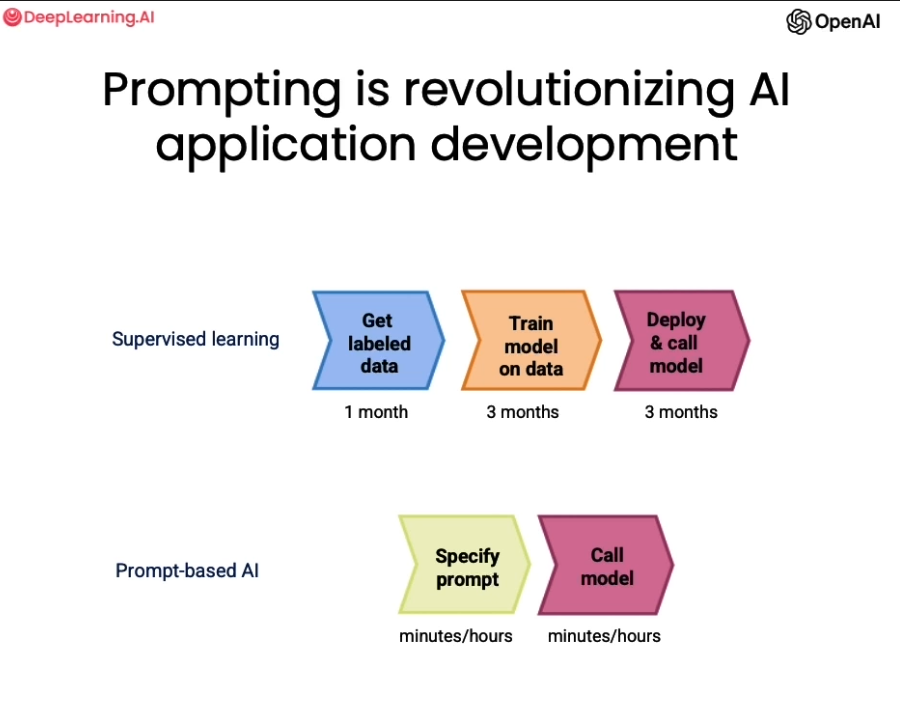